In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [420]:
!unzip 'drive/MyDrive/vegetables.zip' -d 'drive/MyDrive/'

Archive:  drive/MyDrive/vegetables.zip
   creating: drive/MyDrive/vegetables/
   creating: drive/MyDrive/vegetables/apple gourd/
  inflating: drive/MyDrive/vegetables/apple gourd/apple gourd transparent1.jpg  
  inflating: drive/MyDrive/vegetables/apple gourd/apple gourd transparent18.jpg  
  inflating: drive/MyDrive/vegetables/apple gourd/apple gourd transparent28.jpg  
  inflating: drive/MyDrive/vegetables/apple gourd/apple gourd transparent3.jpg  
  inflating: drive/MyDrive/vegetables/apple gourd/apple gourd transparent48.jpg  
  inflating: drive/MyDrive/vegetables/apple gourd/apple gourd transparent49.jpg  
  inflating: drive/MyDrive/vegetables/apple gourd/apple gourd transparent5.jpg  
  inflating: drive/MyDrive/vegetables/apple gourd/apple gourd1.jpg  
  inflating: drive/MyDrive/vegetables/apple gourd/apple gourd10.jpg  
  inflating: drive/MyDrive/vegetables/apple gourd/apple gourd11.jpg  
  inflating: drive/MyDrive/vegetables/apple gourd/apple gourd12.jpg  
  inflating: drive/My

In [421]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.models import Sequential,Model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [422]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.5.0
Hub version: 0.12.0
GPU available (YESS!!!!)


In [423]:
!pip install split-folders

In [424]:
import splitfolders

In [425]:
input = 'drive/MyDrive/vegetables/'
output = 'drive/MyDrive/vegetables_dataset'
splitfolders.ratio(input,output,seed = 44, ratio = (0.8,0.2))


Copying files: 0 files [00:00, ? files/s]
Copying files: 8 files [00:00, 27.48 files/s]
Copying files: 11 files [00:00, 28.14 files/s]
Copying files: 26 files [00:00, 34.19 files/s]
Copying files: 41 files [00:00, 44.29 files/s]
Copying files: 48 files [00:00, 48.35 files/s]
Copying files: 61 files [00:01, 53.41 files/s]
Copying files: 76 files [00:01, 65.10 files/s]
Copying files: 85 files [00:01, 56.19 files/s]
Copying files: 95 files [00:01, 59.09 files/s]
Copying files: 112 files [00:01, 73.34 files/s]
Copying files: 123 files [00:01, 72.28 files/s]
Copying files: 133 files [00:01, 69.30 files/s]
Copying files: 147 files [00:02, 71.16 files/s]
Copying files: 160 files [00:02, 81.54 files/s]
Copying files: 170 files [00:02, 76.96 files/s]
Copying files: 180 files [00:02, 73.56 files/s]
Copying files: 196 files [00:02, 87.41 files/s]
Copying files: 207 files [00:02, 81.17 files/s]
Copying files: 217 files [00:02, 74.24 files/s]
Copying files: 230 files [00:03, 74.07 files/s]
Copying

In [492]:
img_width, img_height = (224,224)
batch_size = 20
train_data_directory = "drive/MyDrive/vegetables_dataset/train/"
val_data_directory = "drive/MyDrive/vegetables_dataset/val"

In [463]:
names = []
images = []
for i in os.listdir(train_data_directory):
    for image_filename in os.listdir(train_data_directory + i):
        names.append(i) # name
        images.append(i + '/' + image_filename) # image

In [465]:
train_pics = pd.DataFrame({'Labels':names,'Images':images})
train_pics

Labels                                    Images
0     apple gourd             apple gourd/apple gourd55.jpg
1     apple gourd             apple gourd/apple gourd31.jpg
2     apple gourd             apple gourd/apple gourd34.jpg
3     apple gourd  apple gourd/apple gourd transparent1.jpg
4     apple gourd             apple gourd/apple gourd65.jpg
...           ...                                       ...
2638     zucchini       zucchini/zucchini transparent24.jpg
2639     zucchini        zucchini/zucchini transparent2.jpg
2640     zucchini       zucchini/zucchini transparent68.jpg
2641     zucchini       zucchini/zucchini transparent77.jpg
2642     zucchini        zucchini/zucchini transparent3.jpg

[2643 rows x 2 columns]

In [466]:
print(train_pics.describe())
print(train_pics.head())

       Labels                      Images
count    2643                        2643
unique     38                        2643
top      okra  mint/mint transparnet4.jpg
freq      136                           1
        Labels                                    Images
0  apple gourd             apple gourd/apple gourd55.jpg
1  apple gourd             apple gourd/apple gourd31.jpg
2  apple gourd             apple gourd/apple gourd34.jpg
3  apple gourd  apple gourd/apple gourd transparent1.jpg
4  apple gourd             apple gourd/apple gourd65.jpg


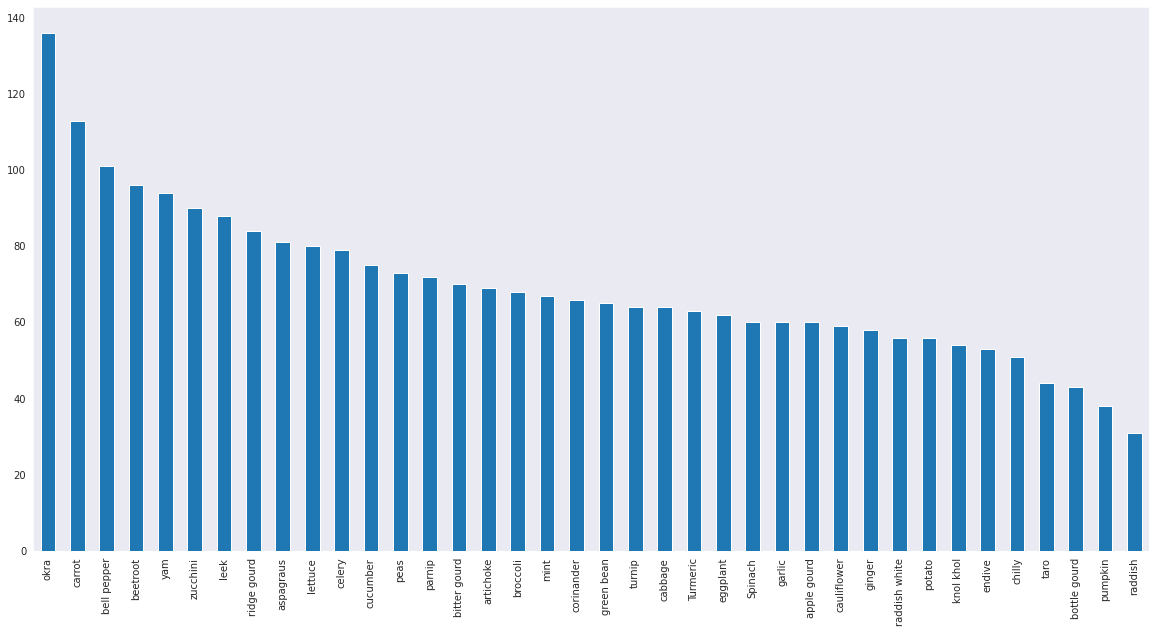

In [467]:
# How many images are there of each catagory?
train_pics["Labels"].value_counts().plot.bar(figsize=(20, 10));

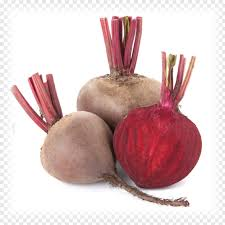

In [468]:
from IPython.display import display, Image
Image("/content/drive/MyDrive/vegetables/beetroot/beet transparent19.jpg")

In [469]:
from collections import Counter
newData = Counter(train_pics["Labels"])
most_pics = newData.most_common(15)

print("The 15 most frequently found fruits in the data set and their number")
most_pics

The 15 most frequently found fruits in the data set and their number


[('okra', 136),
 ('carrot', 113),
 ('bell pepper', 101),
 ('beetroot', 96),
 ('yam', 94),
 ('zucchini', 90),
 ('leek', 88),
 ('ridge gourd', 84),
 ('aspagraus', 81),
 ('lettuce', 80),
 ('celery', 79),
 ('cucumber', 75),
 ('peas', 73),
 ('parnip', 72),
 ('bitter gourd', 70)]

In [ ]:
x,y = zip(*most_pics)
x,y = list(x),list(y)

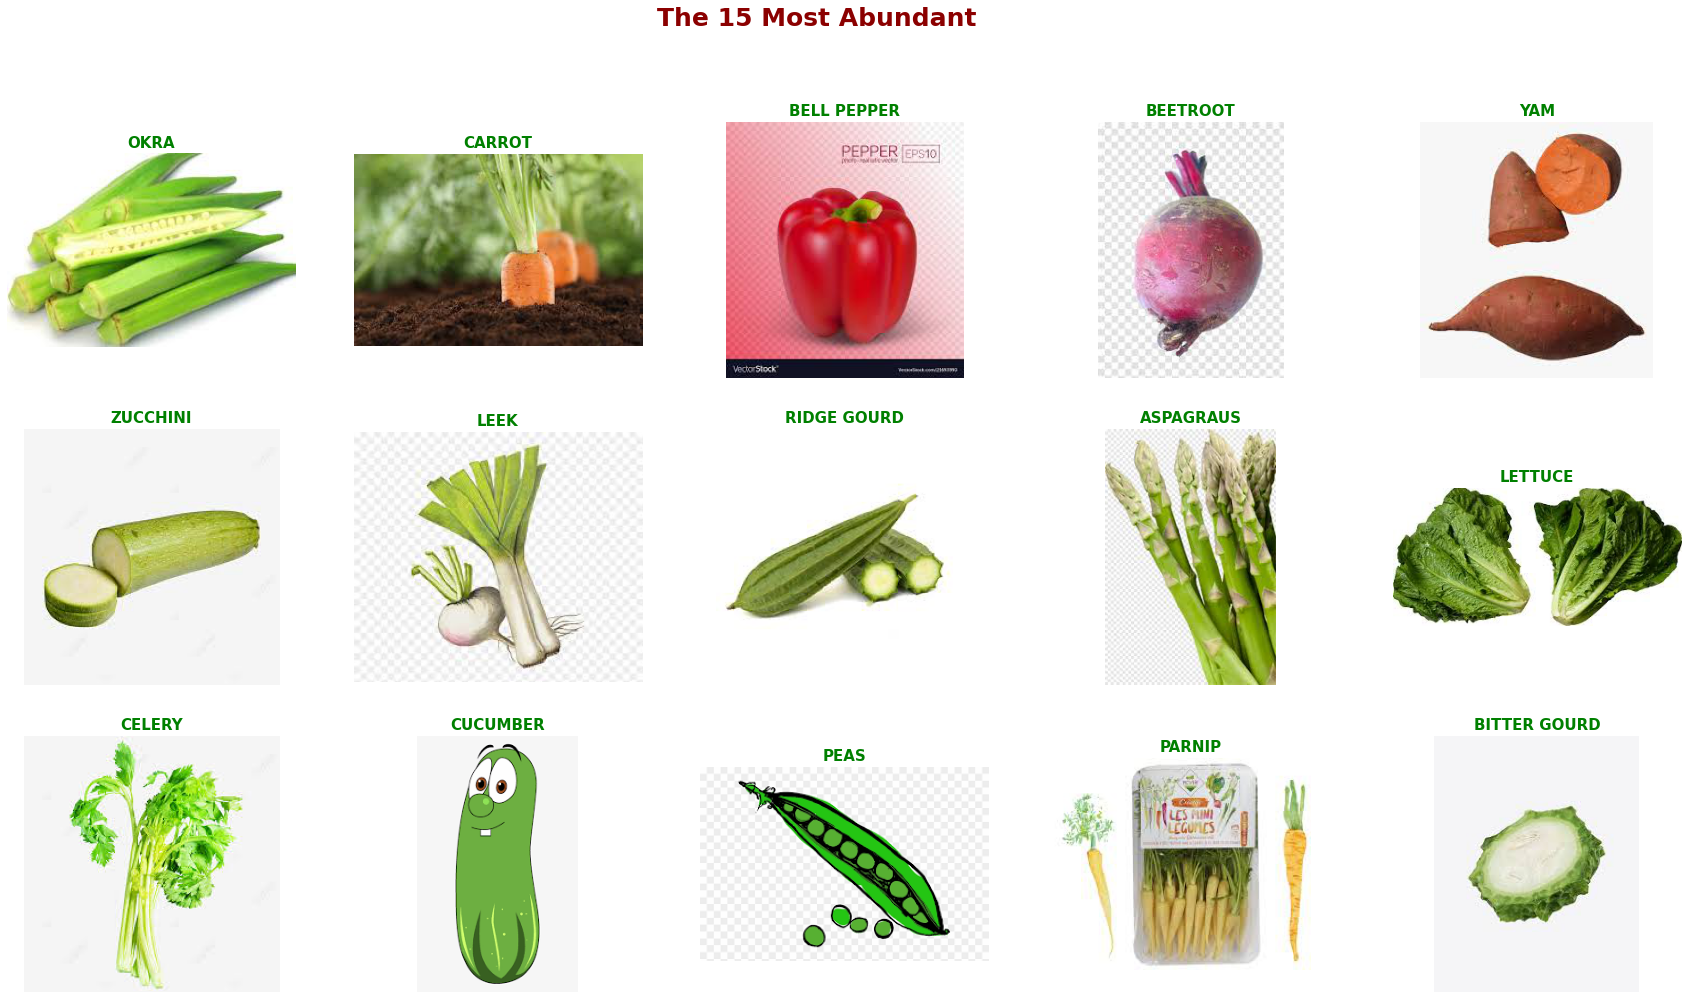

In [437]:
plt.figure(figsize=(30,16))
how_many_pics = len(x)

for i in range(how_many_pics):
    names = train_pics[train_pics["Labels"] == x[i]]["Images"].values [1]
    
    plt.subplot(3,5,i+1)
    img = load_img(train_data_directory + names)
    plt.imshow(img)
    plt.title(x[i].upper(), color = "green", fontsize = 15 , fontweight = 600)
    plt.axis("off")

plt.suptitle("The 15 Most Abundant", fontsize = 25 , color = "darkred", fontweight = 'bold')
plt.show()

In [522]:
datagen = ImageDataGenerator(rescale=1./255,shear_range=0.1,zoom_range=0.1,horizontal_flip=True, fill_mode='nearest')
train_generator = datagen.flow_from_directory(train_data_directory, 
                                                    target_size=(img_width, img_height), 
                                                    class_mode='categorical', 
                                                    shuffle = True,
                                                    batch_size=batch_size,)
val_generator = datagen.flow_from_directory(val_data_directory, 
                                                    target_size=(img_width, img_height), 
                                                    class_mode='categorical', 
                                                    batch_size=batch_size,shuffle = False)

Found 2643 images belonging to 39 classes.
Found 677 images belonging to 39 classes.


In [440]:
print(train_generator.class_indices)

unique_labels = '\n'.join(sorted(train_generator.class_indices.keys()))

with open('drive/MyDrive/labels/vegetables_labels.txt','w') as f:
  f.write(unique_labels)

{'Spinach': 0, 'Turmeric': 1, 'apple gourd': 2, 'artichoke': 3, 'aspagraus': 4, 'beetroot': 5, 'bell pepper': 6, 'bitter gourd': 7, 'bottle gourd': 8, 'broccoli': 9, 'cabbage': 10, 'carrot': 11, 'cauliflower': 12, 'celery': 13, 'chilly': 14, 'corinander': 15, 'corn': 16, 'cucumber': 17, 'eggplant': 18, 'endive': 19, 'garlic': 20, 'ginger': 21, 'green bean': 22, 'knol khol': 23, 'leek': 24, 'lettuce': 25, 'mint': 26, 'okra': 27, 'parnip': 28, 'peas': 29, 'potato': 30, 'pumpkin': 31, 'raddish': 32, 'raddish white': 33, 'ridge gourd': 34, 'taro': 35, 'turnip': 36, 'yam': 37, 'zucchini': 38}


In [542]:
unique_labels = unique_labels.split('\n')

In [ ]:
# test_generator = datagen.flow_from_directory(test_data_directory, 
#                                                     target_size=(img_width, img_height), 
#                                                     class_mode='categorical',shuffle=False, 
#                                                     batch_size=1)

Found 10885 images belonging to 38 classes.


In [523]:
INPUT_SHAPE = [None, img_height, img_width, 3] # batch, height, width, colour channels

# Setup output shape of our model
OUTPUT_SHAPE = train_generator.num_classes

# Setup model URL from TensorFlow Hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5"

In [524]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
  print("Building model with:", MODEL_URL)

  # Setup the model layers
  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL), # Layer 1 (input layer)
    tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                          activation="softmax") # Layer 2 (output layer)
  ])

  # Compile the model
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=["accuracy"]
  )

  # Build the model
  model.build(INPUT_SHAPE)

  return model

In [525]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5
Model: "sequential_32"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_32 (KerasLayer)  (None, 1001)              2555993   
_________________________________________________________________
dense_32 (Dense)             (None, 39)                39078     
Total params: 2,595,071
Trainable params: 39,078
Non-trainable params: 2,555,993
_________________________________________________________________


In [526]:
# Load TensorBoard notebook extension
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [527]:
import datetime
# Create a function to build a TensorBoard callback
def create_tensorboard_callback():
  # Create a log directory for storing TensorBoard logs
  logdir = os.path.join("drive/MyDrive/Data/vegetables_logs",
                        # Make it so the logs get tracked whenever we run an experiment
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [528]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=2)

In [529]:
NUM_EPOCHS = 5 #@param {type:"slider", min:5, max:100, step:5}

In [530]:
# Build a function to train and return a trained model
def train_model():
  """
  Trains a given model and returns the trained version.
  """
  # Create a model
  model = create_model()

  # Create new TensorBoard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  # Fit the model to the data passing it the callbacks we created
  model.fit(x=train_generator,
            epochs=NUM_EPOCHS,
            validation_data=val_generator,
            validation_freq=1,
            callbacks=[tensorboard, early_stopping])
  # Return the fitted model
  return model

In [531]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [532]:
#Fit the model to the data
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v3_small_100_224/classification/5
Epoch 1/5
133/133 [==============================] - 39s 271ms/step - loss: 2.1176 - accuracy: 0.4578 - val_loss: 1.2226 - val_accuracy: 0.6558
Epoch 2/5
133/133 [==============================] - 34s 256ms/step - loss: 0.7867 - accuracy: 0.7726 - val_loss: 1.0721 - val_accuracy: 0.7046
Epoch 3/5
133/133 [==============================] - 34s 258ms/step - loss: 0.5208 - accuracy: 0.8547 - val_loss: 1.0927 - val_accuracy: 0.6972
Epoch 4/5
133/133 [==============================] - 34s 257ms/step - loss: 0.3859 - accuracy: 0.8933 - val_loss: 0.9976 - val_accuracy: 0.7267
Epoch 5/5
133/133 [==============================] - 34s 258ms/step - loss: 0.2939 - accuracy: 0.9187 - val_loss: 0.9689 - val_accuracy: 0.7297


In [533]:
val_loss, val_acc = model.evaluate(val_generator)

34/34 [==============================] - 7s 205ms/step - loss: 0.9852 - accuracy: 0.7164


In [537]:
Y_pred = model.predict(val_generator)
Y_pred = np.argmax(Y_pred, axis=1)
val_labels = val_generator.classes

In [538]:
class_names = os.listdir(train_data_directory)

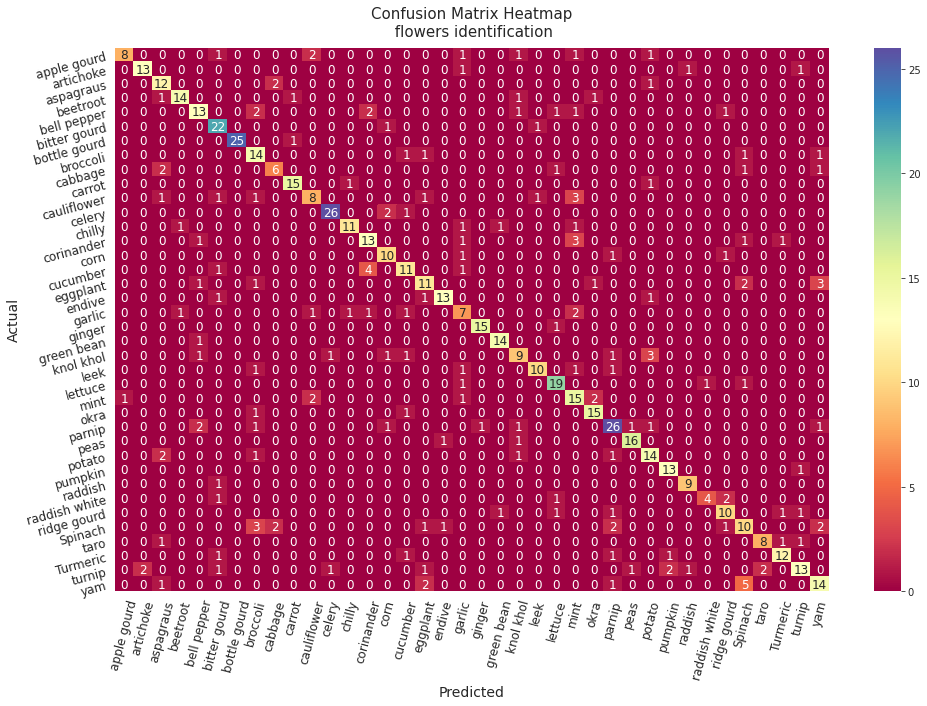

In [539]:
conf_mat = confusion_matrix(val_labels,Y_pred)
sns.set_style(style='dark')
plt.figure(figsize=(16,10))
heatmap = sns.heatmap(conf_mat,vmin=np.min(conf_mat.all()), vmax=np.max(conf_mat), annot=True,fmt='d', annot_kws={"fontsize":12},cmap='Spectral')
heatmap.set_title('Confusion Matrix Heatmap\n flowers identification', fontdict={'fontsize':15}, pad=12)
heatmap.set_xlabel('Predicted',fontdict={'fontsize':14})
heatmap.set_ylabel('Actual',fontdict={'fontsize':14})
heatmap.set_xticklabels(class_names, fontdict={'fontsize':12,'rotation': 75})
heatmap.set_yticklabels(class_names, fontdict={'fontsize':12,'rotation': 15})
plt.show()

In [540]:
predictions = model.predict(val_generator)

In [543]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_labels[np.argmax(prediction_probabilities)]

# Get a predicted label based on an array of prediction probabilities
pred_label = get_pred_label(predictions[79])
pred_label

'aspagraus'

In [545]:
import matplotlib.image as mpimg
filenames_n = ['drive/MyDrive/vegetables_dataset/val/' + fname for fname in val_generator.filenames]

In [546]:
labels = val_generator.classes
true_labels = [unique_labels[i] for i in labels]


In [547]:
def plot_pred(prediction_probabilities, labels, images, n=1):
  """
  View the prediction, ground truth label and image for sample n.
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  
  # Plot image & remove ticks
  plt.imshow(mpimg.imread(image))
  plt.xticks([])
  plt.yticks([])

  # Change the color of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.title("{} {:2.0f}% ({})".format(pred_label,
                                      np.max(pred_prob)*100,
                                      true_label),
                                      color=color)

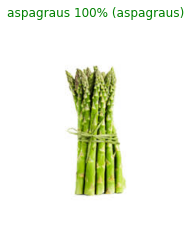

In [549]:
# View an example prediction, original image and truth label
plot_pred(prediction_probabilities=predictions,
          labels=true_labels,
          images=filenames_n, n = 80)

In [550]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plots the top 10 highest prediction confidences along with
  the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  # top_10_pred_labels = map(unique_labels.__getitem__, top_10_pred_indexes)
  # top_10_pred_labels = unique_labels[top_10_pred_indexes]
  top_10_pred_labels= [unique_labels[i] for i in top_10_pred_indexes]
  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)), 
                     top_10_pred_values, 
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")

  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

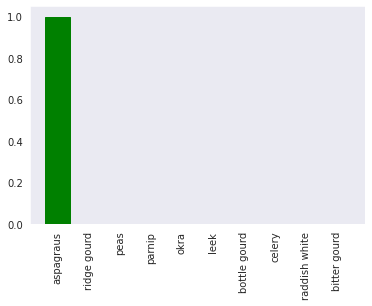

In [551]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=true_labels,
               n=80)

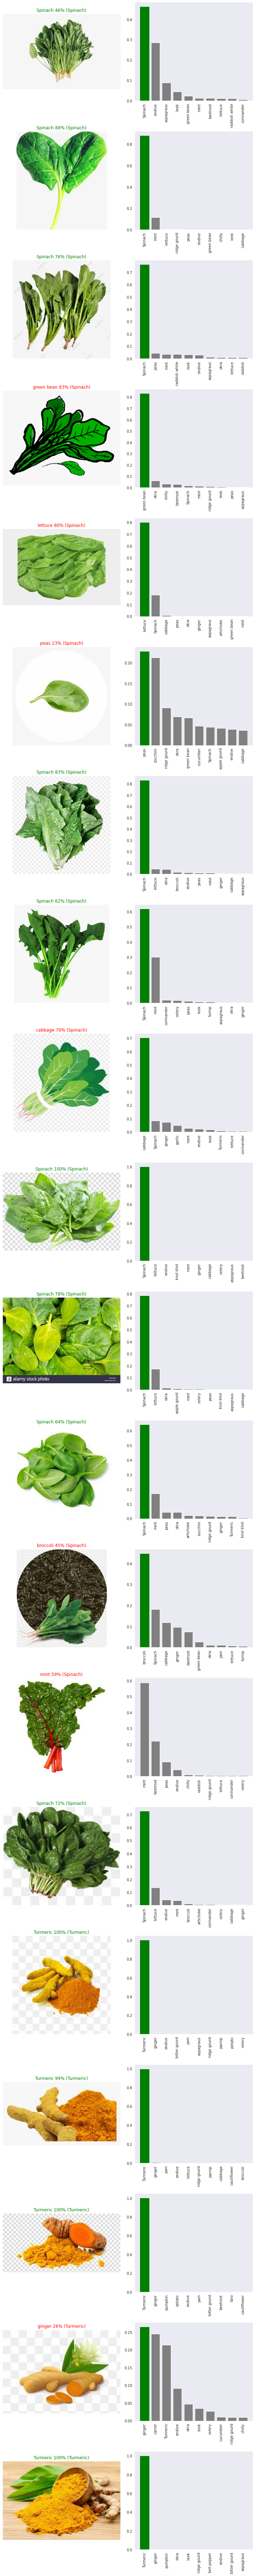

In [555]:
# Let's check a few predictions and their different values
i_multiplier = 0
num_rows = 20
num_cols = 1
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=true_labels,
            images=filenames_n,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=true_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

In [553]:
saved_model_dir = ''
tf.saved_model.save(model,saved_model_dir)

# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('drive/MyDrive/tflite_models/vegetables_model.tflite', 'wb') as f:
  f.write(tflite_model)


FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.


INFO:tensorflow:Assets written to: assets


INFO:tensorflow:Assets written to: assets


In [554]:
# Create a function to save a model
def save_model(model, suffix=None):
  """
  Saves a given model in a models directory and appends a suffix (string).
  """
  # Create a model directory pathname with current time
  modeldir = os.path.join("drive/MyDrive/tf_models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [556]:
# Save our model trained on whole images
save_model(model, suffix="vegetables-identification-mobilenet_v3_small_100_224")

Saving model to: drive/MyDrive/tf_models/20210528-04111622175108-vegetables-identification-mobilenet_v3_small_100_224.h5...


'drive/MyDrive/tf_models/20210528-04111622175108-vegetables-identification-mobilenet_v3_small_100_224.h5'

In [557]:
# Create a function to load a trained model
def load_model(model_path):
  """
  Loads a saved model from a specified path.
  """
  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path, 
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [558]:
model = load_model('/content/drive/MyDrive/tf_models/20210528-04111622175108-vegetables-identification-mobilenet_v3_small_100_224.h5')

Loading saved model from: /content/drive/MyDrive/tf_models/20210528-04111622175108-vegetables-identification-mobilenet_v3_small_100_224.h5


In [561]:
labels = ['Spinach', 'Turmeric', 'apple gourd', 'artichoke', 'aspagraus', 'beetroot', 'bell pepper', 'bitter gourd', 'bottle gourd', 'broccoli', 'cabbage', 'carrot', 'cauliflower', 'celery', 'chilly', 'corinander', 'corn', 'cucumber', 'eggplant', 'endive', 'garlic', 'ginger', 'green bean', 'knol khol', 'leek', 'lettuce', 'mint', 'okra', 'parnip', 'peas', 'potato', 'pumpkin', 'raddish', 'raddish white', 'ridge gourd', 'taro', 'turnip', 'yam', 'zucchini']

cauliflower


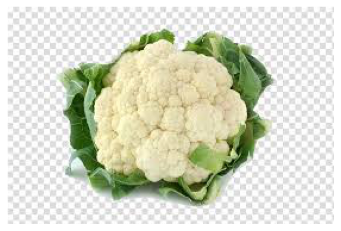

In [565]:
import os
from keras.preprocessing import image

def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(224, 224))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # image path
    img_path = '/content/drive/MyDrive/vegetables_dataset/val/cauliflower/cauliflower transparent37.jpg'
    #img_path = '/media/data/dogscats/test1/19.jpg'      # cat
    # load a single image
    new_image = load_image(img_path)
    import matplotlib.image as mpimg
    plt.imshow(mpimg.imread(img_path))
    plt.xticks([])
    plt.yticks([])
    # check prediction
    pred = model.predict(new_image)
    print(labels[pred.argmax()])